 Project Overview - Customer Segmentation for a Retail Chain


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Basic Information ---
no of rows: 200
no of cols: 5

--- Summary Statistics ---
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Index(['customerid', 'gender', 'age', 'annual_income_(k$)',
       'spending_score_(1_100)'],
      dtype='object')



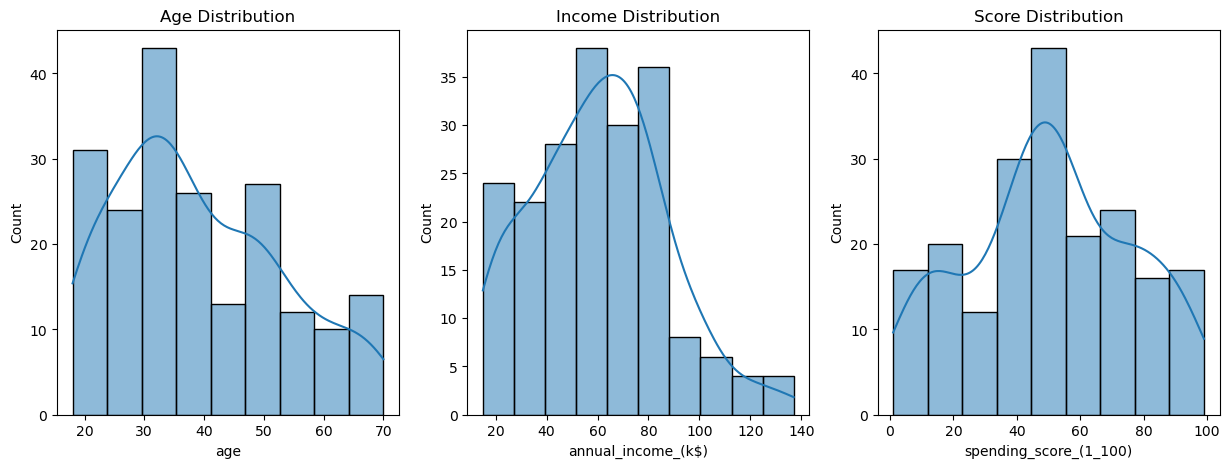

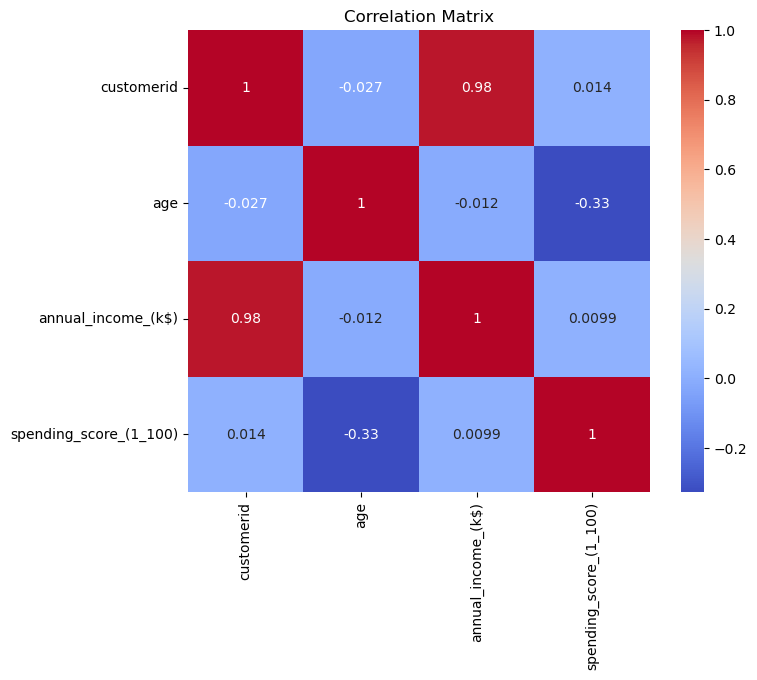

C:\Users\VINAY KUMAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\VINAY KUMAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\VINAY KUMAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\VINAY KUMAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

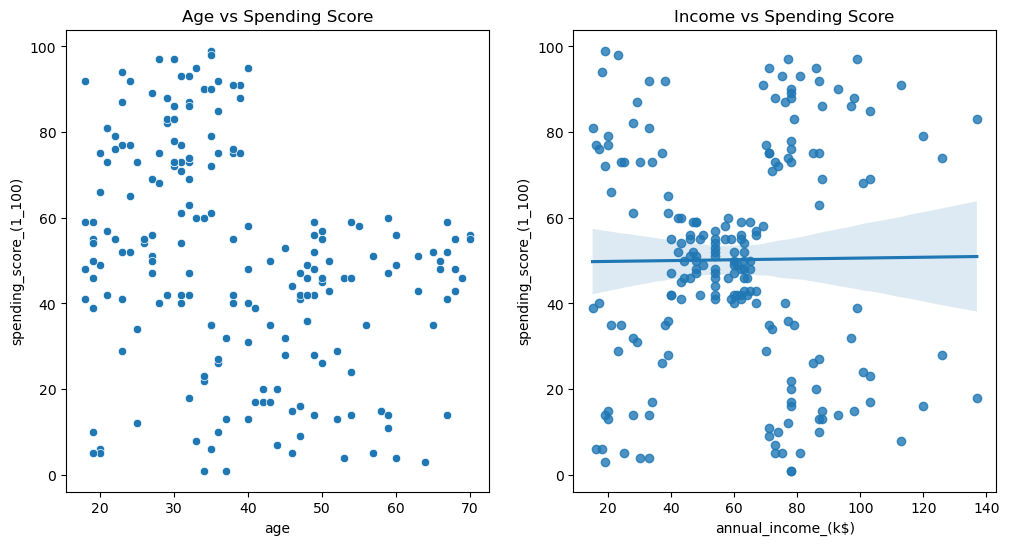

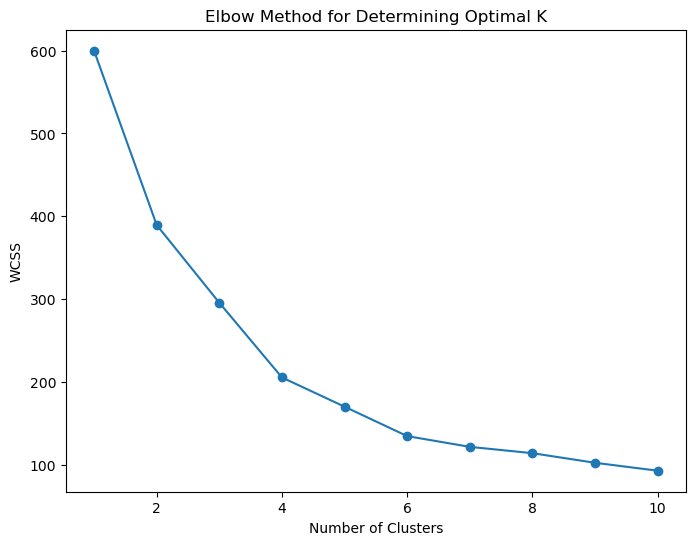

C:\Users\VINAY KUMAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


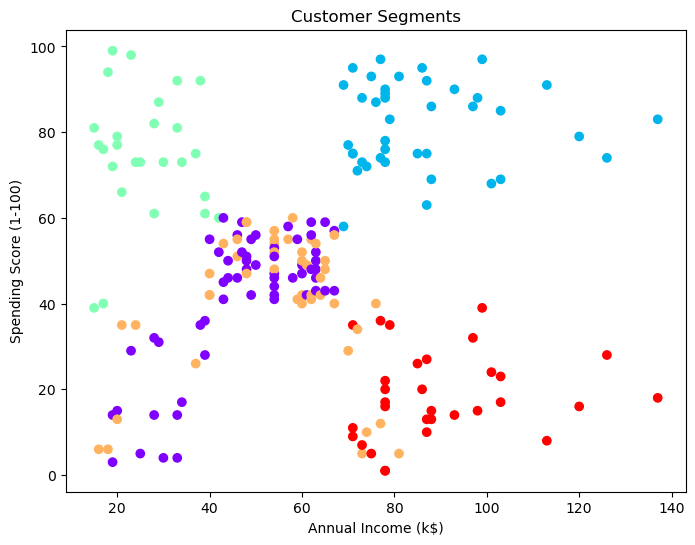

   Segment        age  annual_income_(k$)  spending_score_(1_100)
0        0  55.275862           47.620690               41.706897
1        1  32.875000           86.100000               81.525000
2        2  25.769231           26.115385               74.846154
3        3  26.733333           54.311111               40.911111
4        4  44.387097           89.774194               18.483871


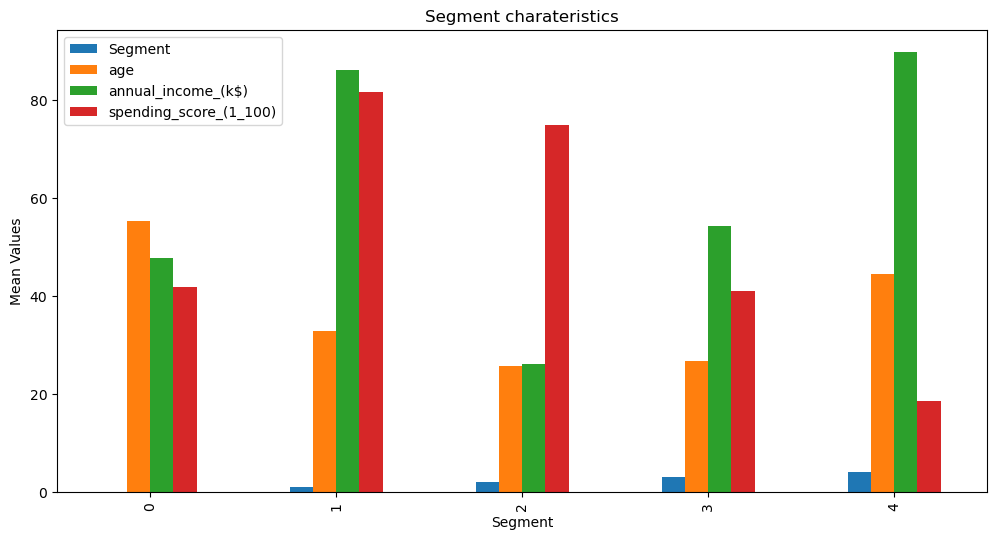

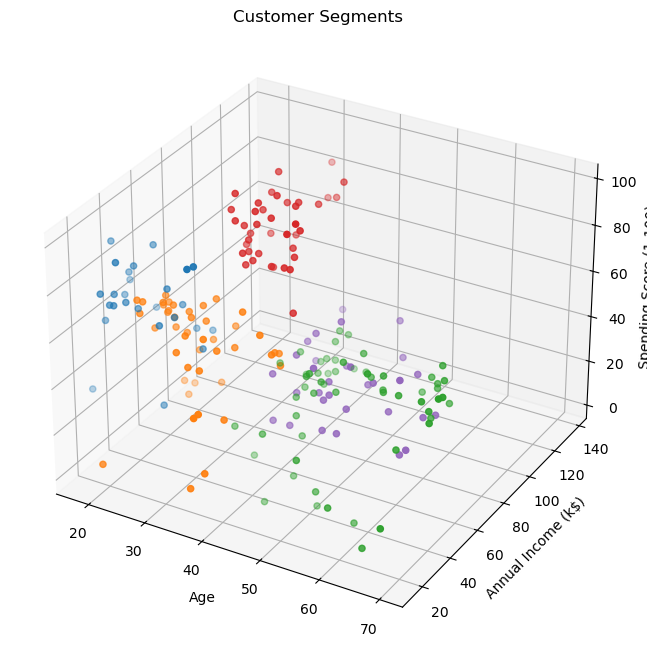

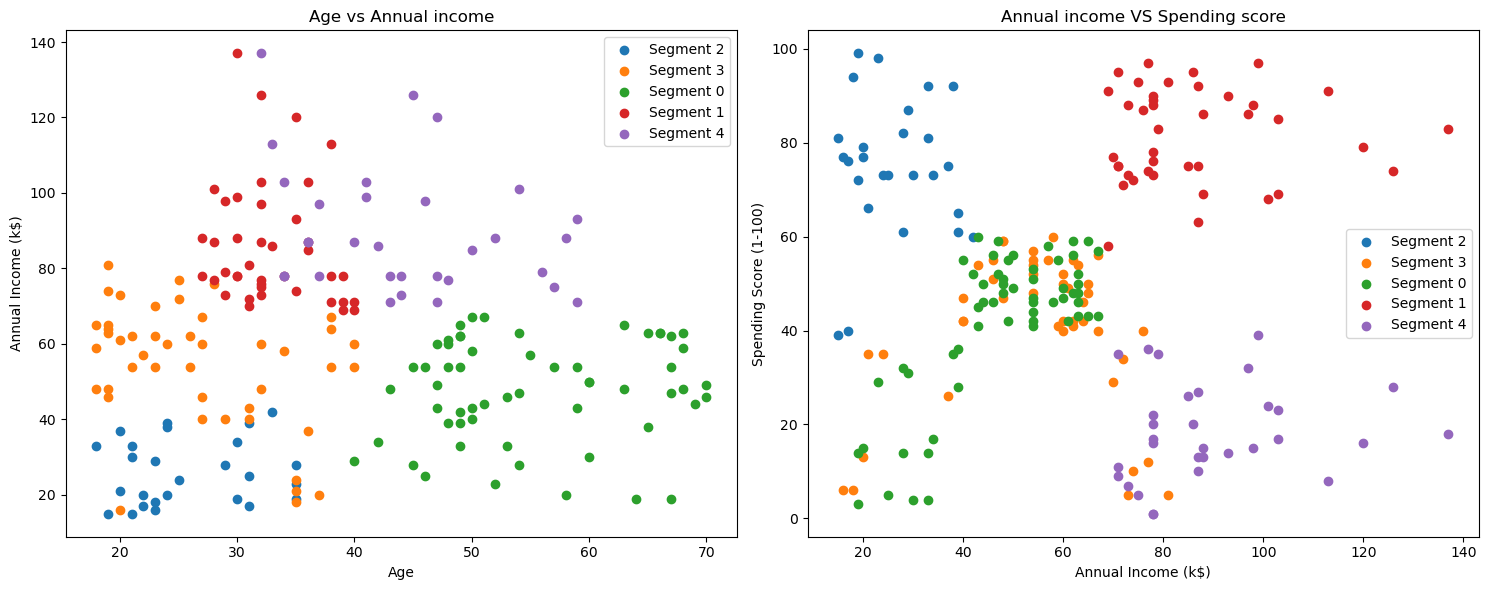

Segment 2: Young high spenders. Potential target for loyalty programs.
Segment 4: High income but low spending. Potential for upselling.
*Recommendations*
Segment 1- Offer premium products or services to this segment.
Segment 2- Create loyalty programs that reward this segment for repeat purchases.
Segment 3- Offer personalized products or services to customers based on their demographics and spending behavior.


In [ ]:
# Customer Segmentation for a Retail Chain

# Importing Libraries and Loading the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os

# Prevent warning (OMP threads)
os.environ["OMP_NUM_THREADS"] = "1"

# Load the data
df = pd.read_csv('Mall_Customers.csv')
df.head()

# Basic Data Overview
# Show top rows, shape, dtypes
print(df.head())
print("\n--- Basic Information ---")
rows,cols= df.shape
print('no of rows:', rows)
print('no of cols:', cols)
print("\n--- Summary Statistics ---")
print(df.dtypes)
print()
# Clean column names if needed
def clean_column_names(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
    return df

df = clean_column_names(df)
print(df.columns)
print()

# EDA (Exploratory Data Analysis)
# Visualize distributions (Age, Income, Score)
fig, axs = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(df['age'], ax=axs[0], kde=True)
axs[0].set_title('Age Distribution')
sns.histplot(df['annual_income_(k$)'], ax=axs[1], kde=True)
axs[1].set_title('Income Distribution')
sns.histplot(df['spending_score_(1_100)'], ax=axs[2], kde=True)
axs[2].set_title('Score Distribution')

# Correlation heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64']) 
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Use Seaborn/Matplotlib to show:
# Age vs Spending Score
fig, axs =plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x='age', y='spending_score_(1_100)', data=df, ax=axs[0])
axs[0].set_title('Age vs Spending Score')
# Income vs Spending Score
sns.regplot(x='annual_income_(k$)', y='spending_score_(1_100)', data=df, ax=axs[1])
axs[1].set_title('Income vs Spending Score')

# Feature Selection for Clustering
# Use K-Means Clustering (with Scikit-learn)
features = df[['age', 'annual_income_(k$)', 'spending_score_(1_100)']]
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Elbow Method to Find Optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Determining Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with Optimal K=5
optimal_k = 5  # Replace with the optimal K value based on the plot
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
segments = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(features['annual_income_(k$)'], features['spending_score_(1_100)'], c=segments, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

# Add cluster column to original data
df['Segment'] = segments

'''Segment Analysis'''
# Describe each segment:
# Who are they?
segment_charateristics = df.groupby('Segment')[['age', 'annual_income_(k$)', 'spending_score_(1_100)']].mean().reset_index()
print(segment_charateristics)
# What characterizes their spending behavior?
# To describe each segment , you can analyze the output table and look for patterns and trends. for example:
'''Segment 0: Young adults with low income and moderate spending score.
Segment 1: Middle-aged individuals with high income and high spending score.
Segment 2: Older adults with low income and low spending score.'''
# there are different different mind_set behaviors. so, i will show visualization techniques with (bar charts)
# plot segment charateristics
segment_charateristics.plot(kind='bar', figsize=(12, 6))
plt.title('Segment charateristics')
plt.xlabel('Segment')
plt.ylabel('Mean Values')
plt.show()

# Visualizing Clusters
# create a 3D cluster plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# plot each cluster
for segment in df['Segment'].unique():
    segment_df = df[df['Segment'] == segment]
    ax.scatter(segment_df['age'], segment_df['annual_income_(k$)'], segment_df['spending_score_(1_100)'], label=f'Segment {segment}')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segments')
ax.legend
plt.show()

# create 2D scatter plots
fig, axs = plt.subplots(1,2, figsize=(15,6))
# plot Age vs Annual income
for segment in df['Segment'].unique():
    segment_df = df[df['Segment'] == segment]
    axs[0].scatter(segment_df['age'], segment_df['annual_income_(k$)'], label=f'Segment {segment}')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Annual Income (k$)')
axs[0].set_title('Age vs Annual income')
axs[0].legend()
# plot Annual income VS Spending score
for segment in df['Segment'].unique():
    segment_df = df[df['Segment'] == segment]
    axs[1].scatter(segment_df['annual_income_(k$)'], segment_df['spending_score_(1_100)'], label=f'Segment {segment}')
axs[1].set_xlabel('Annual Income (k$)')
axs[1].set_ylabel('Spending Score (1-100)')
axs[1].set_title('Annual income VS Spending score')
axs[1].legend()
plt.tight_layout()
plt.show()

# Key Insights + Recommendations'''
# What can the business do with these segments?
# E.g: High income but low spending → upsell opportunities
# Young high spenders → target for loyalty programs

# analyze the segment charateristics
segment_characteristics = df.groupby('Segment')[['age', 'annual_income_(k$)', 'spending_score_(1_100)']].mean()
# Key Insights
for segment, characteristics in segment_characteristics.iterrows():
    if characteristics['annual_income_(k$)'] > 80 and characteristics['spending_score_(1_100)'] < 40:
        print(f'Segment {segment}: High income but low spending. Potential for upselling.')
    elif characteristics['age'] < 30 and characteristics['spending_score_(1_100)'] > 60:
        print(f'Segment {segment}: Young high spenders. Potential target for loyalty programs.')
print('*Recommendations*')
print('Segment 1- Offer premium products or services to this segment.')
print('Segment 2- Create loyalty programs that reward this segment for repeat purchases.')
print('Segment 3- Offer personalized products or services to customers based on their demographics and spending behavior.')

#** Recommendations **
#Segment 1: High Income, Low Spending
#- Offer premium products or services to this segment.
#- Provide personalized marketing messages highlighting the benefits of premium products.

#Segment 2: Young High Spenders
#- Create loyalty programs that reward this segment for repeat purchases.
#- Offer exclusive discounts or promotions to this segment.

#Segment 3: Mid-Age, Mid-Income
#- Offer personalized products or services to customers based on their demographics and spending behavior.
#- Provide targeted marketing messages highlighting the benefits of our products.'''

# 📌 Business Insight (in Markdown)
# See README file for conclusions


